<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>Деревья решений, случайные леса (практика)</center></h2>

**Срок сдачи:** 3 апреля 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 3 апреля, -4 балла после 06:00 10 апреля, -6 баллов после 06:00 17 апреля

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

# Практика

### Качество вина (10 баллов)

Давайте все-таки разберемся с [вином](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)!


#### Задание (1 балл)
* Загрузите данные, выполните преобразование целевой переменной: 
    * quality > 5 -> 1
    * quality <= 5 -> 0
* Разделите выборку на обучающую и контрольную в пропорции 80/20

In [6]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df_wine = pd.read_csv(url, sep=';')
df_wine.loc[:, 'quality'] = (df_wine.loc[:, 'quality'] > 5).astype(int)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [7]:
from sklearn.cross_validation import train_test_split
X = df_wine.iloc[:,:11].values
y = df_wine.iloc[:,11].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

/Users/RomanDegtyarev/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Задание (2 балла)

Сфокусируемся на одном гиперпараметре деревьев решений - максимальной глубине.

Подберите наилучшую глубину `d` дерева с помошью 
* Усредненной оценки качества roc-auc на кросс-валидации при различных `d`
* Валидационных кривых

In [8]:
from sklearn.tree import DecisionTreeClassifier

try:
    from sklearn.model_selection import cross_val_score
except ImportError:
    from sklearn.cross_validation import cross_val_score

try:
    from sklearn.model_selection import validation_curve
except ImportError:
    from sklearn.learning_curve import validation_curve

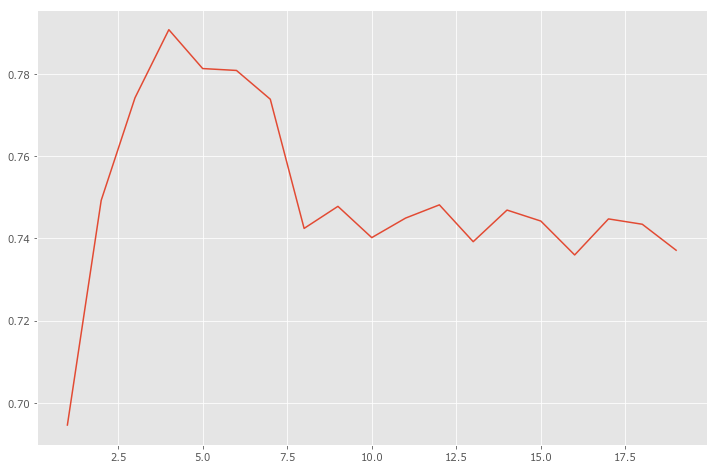

In [9]:
# Your Code Here
scores = []
for d in range(1,20):
    model = DecisionTreeClassifier(max_depth=d)
    scores.append(cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean())
plt.plot(range(1,20), scores)

In [10]:
# При мере качества roc-auc виден явный пик на глубине 4 

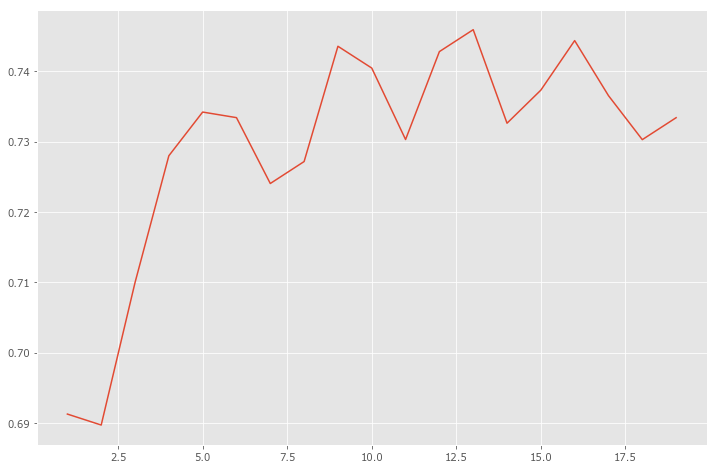

In [11]:
scores = []
for d in range(1,20):
    model = DecisionTreeClassifier(max_depth=d)
    scores.append(cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean())
plt.plot(range(1,20), scores)

In [12]:
# Если выбрать меру качества accuracy, то выбрать оптимальную глубину окажется не так просто.

In [13]:
# Воспользуемся validation_curve 

In [249]:
model = DecisionTreeClassifier(random_state=123) 
train_scores, test_scores = validation_curve(model, X_train, y_train, 'max_depth', 
                                            range(1, 20), n_jobs=-1, cv=5, scoring='roc_auc')

In [250]:
train_mean = train_scores.mean(axis=1) 
test_mean = test_scores.mean(axis=1) 
train_std = train_scores.std(axis=1) 
test_std = test_scores.std(axis=1)

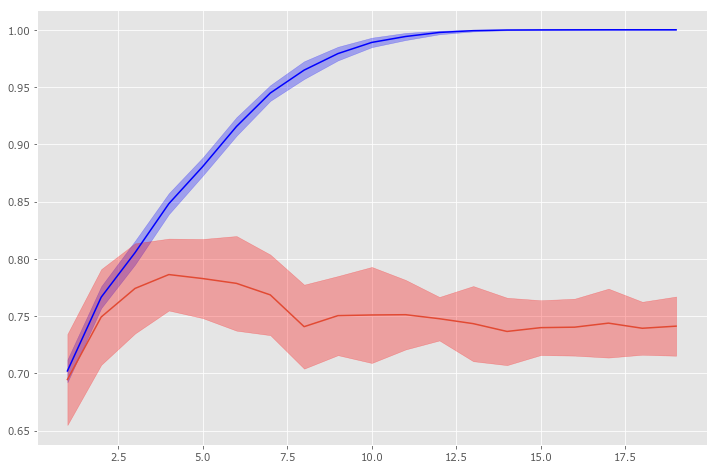

In [16]:
d = range(1,20) 

plt.plot(d, train_mean, color='b') 
plt.plot(d, test_mean) 

plt.fill_between(d, train_mean-train_std, train_mean+train_std, color='b', alpha=0.3) 
plt.fill_between(d, test_mean-test_std, test_mean+test_std, color='r', alpha=0.3)

In [17]:
# При roc-auc видем тот же самый пик 

In [18]:
model = DecisionTreeClassifier(random_state=123) 
train_scores, test_scores = validation_curve(model, X_train, y_train, 'max_depth', 
                                            range(1, 20), n_jobs=-1, cv=5, scoring='accuracy')

In [19]:
train_mean = train_scores.mean(axis=1) # по строкам
test_mean = test_scores.mean(axis=1) 
train_std = train_scores.std(axis=1) 
test_std = test_scores.std(axis=1)

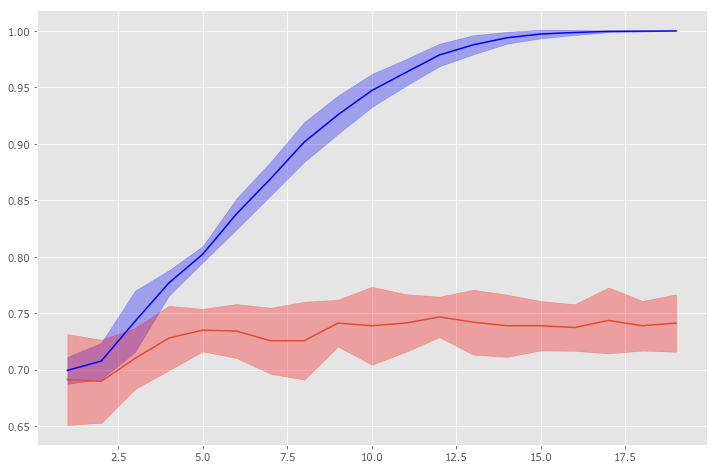

In [20]:
d = range(1,20) 

plt.plot(d, train_mean, color='b') 
plt.plot(d, test_mean) 

plt.fill_between(d, train_mean-train_std, train_mean+train_std, color='b', alpha=0.3) 
plt.fill_between(d, test_mean-test_std, test_mean+test_std, color='r', alpha=0.3)

In [21]:
# Если выбрать меру качества accuracy, то на той глубине, где accuracy был наибольший (где-то в районе 13) ошибка на 
# на трейновой части минимальная - то есть очень сильное переобучение.

In [22]:
# Основываясь, во-первых, на том, что по roc-auc виден пик при max_depth=4, и во-вторых на том, что переобучение по 
# accuracy не такое сильное при max_depth=4, а качество будет повыше, чем в окрестности, то я бы выбрал глубину = 4

#### Задание (1 балл)

Отсортируйте признаки по важности. Вектор с важностью признаков можно получить с помощью `model.feature_importances_`

In [23]:
# Your Code Here
model=DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [24]:
names_of_features=list(df_wine.iloc[:,:11].columns.values)
importances = dict((key, value) for (key, value) in zip(names_of_features,model.feature_importances_))
sorted(importances,key=importances.get)[::-1]

['alcohol',
 'sulphates',
 'total sulfur dioxide',
 'volatile acidity',
 'pH',
 'density',
 'free sulfur dioxide',
 'citric acid',
 'fixed acidity',
 'chlorides',
 'residual sugar']

In [25]:
#Самый важный - alcohol, менее важные: chlorides, fixed acidity, citric acid, free sulfur dioxide - там по нулям.

#### Задание (2 балла)
* Получите предсказания на тестовой выборке
* Постройте ROC кривые для обучающей и тестовой выборок
* Посчитайте остальные меры качества классификации при пороге в `0.5`

In [141]:
# Your Code Here
model=DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)
predict=model.predict(X_test)
predict

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0,

In [217]:
scores_test=model.predict_proba(X_test)
scores_train=model.predict_proba(X_train)

In [143]:
from sklearn.metrics import roc_curve
from itertools import cycle#for plot

In [144]:
fpr_test=np.array([roc_curve(y_test, scores_test[:,i])[0] for i in range(0,2)])
tpr_test=np.array([roc_curve(y_test, scores_test[:,i])[1] for i in range(0,2)])
fpr_train=np.array([roc_curve(y_train, scores_train[:,i])[0] for i in range(0,2)])
tpr_train=np.array([roc_curve(y_train, scores_train[:,i])[1] for i in range(0,2)])

In [145]:
fpr=np.concatenate((fpr_test,fpr_train),axis=0)
tpr=np.concatenate((tpr_test,tpr_train),axis=0)

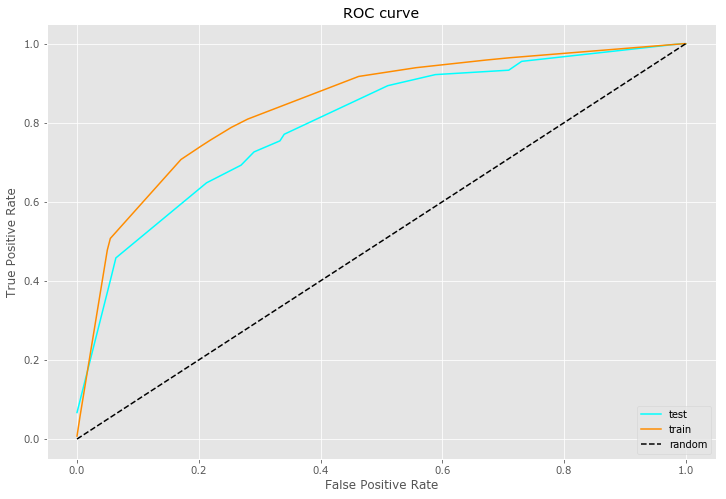

In [223]:
colors = cycle(['aqua', 'darkorange','cornflowerblue', 'red'])
for i, color in zip(range(1,4,2), colors):
    if i>1: s,j='train',i-2
    else: s,j='test', i
    plt.plot(fpr[i], tpr[i], color=color, label='%s' % s)
plt.plot([0, 1], [0, 1], '--', color = 'black', label='random') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC curve') 
plt.legend(loc = "lower right")

In [147]:
from sklearn import metrics
from sklearn.preprocessing import Binarizer

In [190]:
y_pred = Binarizer(threshold=0.5).fit_transform(scores_test)#даст нам метки заданного порога

In [191]:
#Посчитаем accuracy_score
from sklearn.metrics import accuracy_score

In [192]:
#Так как в y_pred[:,0] - метки для первого класса, y_pred[:,1] - метки для второго класса, 
#то это значение accuracy_score относится к первому классу
accuracy_score(y_test, y_pred[:,0])

0.28437499999999999

In [193]:
#А это ко второму
accuracy_score(y_test, y_pred[:,1])

0.71562499999999996

In [194]:
accuracy_score(y_test, y_pred[:,1])+accuracy_score(y_test, y_pred[:,0]) == 1 #нормально

True

In [195]:
#Посчитаем precision
from sklearn.metrics import precision_score

In [196]:
precision_score(y_test, y_pred[:,0])#Для другого класса, как мы уже поняли, precision_score=1-0.3188

0.3188405797101449

In [202]:
#Cohen’s kappa: a statistic that measures inter-annotator agreement
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred[:,1])

0.42180922881423233

In [203]:
#Посчитаем roc_auc_score 
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred[:,0])

0.28957169459962756

In [205]:
#Посчитаем log_loss и так далее...
from sklearn.metrics import log_loss
log_loss(y_test, y_pred[:,1])

9.8220819781752855

#### Задание (1 балл)
Перейдем к модели случайного леса. Зафиксируем некоторую глубину дерева (можно взять оптимальное с предыдущих заданий).

Сравните качество работы 
* Простого дерева решений
* Бэггинга над 10,20,...,100 деревьями решений
* Случайного леса с 10,20,...,100 деревьями решений

Получите график, у которого по оси X откладывается количество деревьев, а по оси Y - качество классификации.

In [3]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Мы уже поняли, что для обычного дерева лучше всего выбрать глубину 4, 
#тогда максимальная оценка accuracy_score=0.78 для тестовой выборки и 
#0.88 - для контрольной выборки. Оценим качество работы Беггинга и случайного леса.

In [262]:
scores_Bg_train = []
scores_RF_train = []
scores_Bg_test = []
scores_RF_test = []
for d in range(10,100,10):
    model_Bg=BaggingClassifier(n_estimators=d, random_state=123)
    model_RF=RandomForestClassifier(n_estimators=d, random_state=123, max_depth=4)
    scores_Bg_train.append(cross_val_score(model_Bg, X_train, y_train, cv=5, scoring='roc_auc').mean())
    scores_RF_train.append(cross_val_score(model_RF, X_train, y_train, cv=5, scoring='roc_auc').mean())
    scores_Bg_test.append(cross_val_score(model_Bg, X_test, y_test, cv=5, scoring='roc_auc').mean())
    scores_RF_test.append(cross_val_score(model_RF, X_test, y_test, cv=5, scoring='roc_auc').mean())

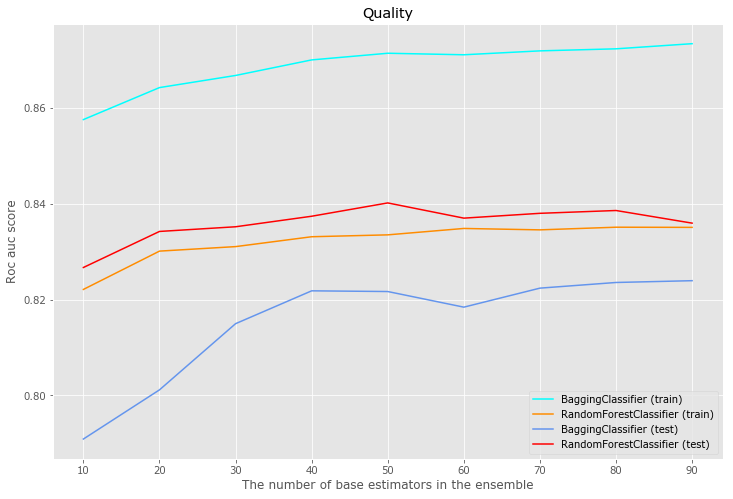

In [263]:
plt.plot(range(10,100,10), scores_Bg_train, color='aqua', label='BaggingClassifier (train)')
plt.plot(range(10,100,10), scores_RF_train, color='darkorange', label='RandomForestClassifier (train)')
plt.plot(range(10,100,10), scores_Bg_test, color='cornflowerblue', label='BaggingClassifier (test)')
plt.plot(range(10,100,10), scores_RF_test, color='red', label='RandomForestClassifier (test)')
plt.xlabel('The number of base estimators in the ensemble') 
plt.ylabel('Roc auc score') 
plt.title('Quality') 
plt.legend(loc = "lower right")

In [266]:
print(scores_Bg_train[4])
print (scores_Bg_test[4])
print (scores_RF_train[4])
print (scores_RF_test[4])

0.87146761735
0.821676440691
0.833518794601
0.840191375401


In [267]:
#Получается, что у рандомного леса качество кластеризации лучше. 
#Если судить по совокупности двух классификаторов, то можно выбрать оптимальное количество деревьев равное 50,
#дальше roc_auc для random forest снижается, а классификатор Беггинга растет незначительно.
#Получены соответствующие оценки: 
#0.87146761735
#0.821676440691  BaggingClassifier 
#0.833518794601
#0.840191375401 RandomForestClassifier

####  Задание (3 балла)
* С помощью `GridSearchCV` или `RandomSearchCV` подберите наиболее оптимальные параметры для случайного леса.
* Для этих параметров сравните средние результаты по кросс-валидации и качество на контрольной выборке

In [273]:
from sklearn import grid_search
clf = RandomForestClassifier(random_state=123)

In [278]:
#Судя по предыдущим пунктам, оптимальными параметрами для случайного леса будут:
#max_depth и n_estimators - выберем их.

In [275]:
opt_params = {'n_estimators' : range(1, 100, 10), 'max_depth' : range(1, 20)}

In [277]:
gridSCV = grid_search.GridSearchCV(clf, opt_params, scoring='roc_auc')
gridSCV.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=123,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [279]:
gridSCV.best_params_

{'max_depth': 15, 'n_estimators': 91}

In [282]:
model = RandomForestClassifier(random_state=123, n_estimators=91, max_depth=15)

In [ ]:
#Качество на контрольной выборке

In [283]:
model.fit(X_train, y_train)
labels = model.predict_proba(X_test)
score = metrics.roc_auc_score(y_test, labels[:,1])
score

0.89187368754705021

In [285]:
#Cредние результаты по кросс-валидации, метрика - roc_auc

In [284]:
score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
score

0.8801792584190089

In [288]:
#метрика - accuracy

In [289]:
score_train = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
score

0.8801792584190089

In [291]:
#и так далее...